In [68]:
import keras
from keras.preprocessing import image
import numpy as np
from joblib import load
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from IPython import display

In [5]:
model = keras.models.load_model("Trained_model") 
clf = load('trained_model_text.joblib')
tfidf_vectorizer = load('tfidf_vectorizer.joblib')

In [6]:
posters_genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

In [7]:
plot_text_genres = ['Absurdism', 'Acid western', 'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 'Addiction Drama', 'Adult', 'Adventure', 'Adventure Comedy', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana', 'Animal Picture', 'Animals', 'Animated Musical', 'Animated cartoon', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Anti-war film', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-Western', 'B-movie', 'Backstage Musical', 'Baseball', 'Beach Film', 'Beach Party film', 'Bengali Cinema', 'Biker Film', 'Biographical film', 'Biography', 'Biopic [feature]', 'Black comedy', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'Breakdance', 'British Empire Film', 'British New Wave', 'Bruceploitation', 'Buddy Picture', 'Buddy cop', 'Buddy film', 'Business', 'C-Movie', 'Camp', 'Caper story', 'Cavalry Film', 'Chase Movie', 'Chick flick', 'Childhood Drama', "Children's", "Children's Entertainment", "Children's Fantasy", "Children's Issues", "Children's/Family", 'Chinese Movies', 'Christian film', 'Christmas movie', 'Clay animation', 'Cold War', 'Combat Films', 'Comdedy', 'Comedy', 'Comedy Thriller', 'Comedy Western', 'Comedy film', 'Comedy horror', 'Comedy of Errors', 'Comedy of manners', 'Comedy-drama', 'Coming of age', 'Coming-of-age film', 'Computer Animation', 'Computers', 'Concert film', 'Conspiracy fiction', 'Costume Adventure', 'Costume Horror', 'Costume drama', 'Courtroom Comedy', 'Courtroom Drama', 'Creature Film', 'Crime', 'Crime Comedy', 'Crime Drama', 'Crime Fiction', 'Crime Thriller', 'Cult', 'Culture & Society', 'Cyberpunk', 'Czechoslovak New Wave', 'Dance', 'Demonic child', 'Detective', 'Detective fiction', 'Disaster', 'Docudrama', 'Documentary', 'Dogme 95', 'Domestic Comedy', 'Doomsday film', 'Drama', 'Dystopia', 'Ealing Comedies', 'Early Black Cinema', 'Education', 'Educational', 'Ensemble Film', 'Environmental Science', 'Epic', 'Epic Western', 'Erotic Drama', 'Erotic thriller', 'Erotica', 'Escape Film', 'Essay Film', 'Existentialism', 'Experimental film', 'Exploitation', 'Expressionism', 'Extreme Sports', 'Fairy tale', 'Family & Personal Relationships', 'Family Drama', 'Family Film', 'Family-Oriented Adventure', 'Fan film', 'Fantasy', 'Fantasy Adventure', 'Fantasy Comedy', 'Fantasy Drama', 'Feature film', 'Female buddy film', 'Feminist Film', 'Fictional film', 'Filipino', 'Filipino Movies', 'Film', 'Film & Television History', 'Film adaptation', 'Film noir', 'Film à clef', 'Film-Opera', 'Filmed Play', 'Finance & Investing', 'Foreign legion', 'Future noir', 'Gangster Film', 'Gay', 'Gay Interest', 'Gay Themed', 'Gay pornography', 'Gender Issues', 'Giallo', 'Glamorized Spy Film', 'Goat gland', 'Gothic Film', 'Graphic & Applied Arts', 'Gross out', 'Gross-out film', 'Gulf War', 'Hagiography', 'Hardcore pornography', 'Haunted House Film', 'Health & Fitness', 'Heaven-Can-Wait Fantasies', 'Heavenly Comedy', 'Heist', 'Hip hop movies', 'Historical Documentaries', 'Historical Epic', 'Historical drama', 'Historical fiction', 'History', 'Holiday Film', 'Homoeroticism', 'Horror', 'Horror Comedy', 'Horse racing', 'Humour', 'Hybrid Western', 'Illnesses & Disabilities', 'Indian Western', 'Indie', 'Inspirational Drama', 'Instrumental Music', 'Interpersonal Relationships', 'Inventions & Innovations', 'Japanese Movies', 'Journalism', 'Jukebox musical', 'Jungle Film', 'Juvenile Delinquency Film', 'Kafkaesque', 'Kitchen sink realism', 'LGBT', 'Language & Literature', 'Latino', 'Law & Crime', 'Legal drama', 'Libraries and librarians', 'Linguistics', 'Live action', 'Malayalam Cinema', 'Marriage Drama', 'Martial Arts Film', 'Master Criminal Films', 'Media Satire', 'Media Studies', 'Medical fiction', 'Melodrama', 'Mockumentary', 'Mondo film', 'Monster', 'Monster movie', 'Movie serial', 'Movies About Gladiators', 'Mumblecore', 'Music', 'Musical', 'Musical Drama', 'Musical comedy', 'Mystery', 'Mythological Fantasy', 'Natural disaster', 'Natural horror films', 'Nature', 'Neo-noir', 'Neorealism', 'New Hollywood', 'New Queer Cinema', 'News', 'Ninja movie', 'Northern', 'Nuclear warfare', 'Operetta', 'Outlaw', 'Outlaw biker film', 'Parkour in popular culture', 'Parody', 'Patriotic film', 'Period Horror', 'Period piece', 'Pinku eiga', 'Plague', 'Point of view shot', 'Political Documetary', 'Political cinema', 'Political drama', 'Political satire', 'Political thriller', 'Pornographic movie', 'Pornography', 'Pre-Code', 'Prison', 'Prison escape', 'Prison film', 'Private military company', 'Propaganda film', 'Psycho-biddy', 'Psychological horror', 'Psychological thriller', 'Punk rock', 'Race movie', 'Reboot', 'Religious Film', 'Remake', 'Revenge', 'Revisionist Fairy Tale', 'Revisionist Western', 'Road movie', 'Road-Horror', 'Roadshow theatrical release', 'Roadshow/Carny', 'Rockumentary', 'Romance Film', 'Romantic comedy', 'Romantic drama', 'Romantic fantasy', 'Romantic thriller', 'Samurai cinema', 'Satire', 'School story', 'Sci Fi Pictures original films', 'Sci-Fi Adventure', 'Sci-Fi Horror', 'Sci-Fi Thriller', 'Science Fiction', 'Science fiction Western', 'Screwball comedy', 'Sex comedy', 'Sexploitation', 'Short Film', 'Silent film', 'Silhouette animation', 'Singing cowboy', 'Slapstick', 'Slasher', 'Slice of life story', 'Social issues', 'Social problem film', 'Softcore Porn', 'Space opera', 'Space western', 'Spaghetti Western', 'Splatter film', 'Sponsored film', 'Sports', 'Spy', 'Stand-up comedy', 'Star vehicle', 'Statutory rape', 'Steampunk', 'Stoner film', 'Stop motion', 'Superhero', 'Superhero movie', 'Supermarionation', 'Supernatural', 'Surrealism', 'Suspense', 'Swashbuckler films', 'Sword and Sandal', 'Sword and sorcery', 'Sword and sorcery films', 'Tamil cinema', 'Teen', 'Television movie', 'The Netherlands in World War II', 'Therimin music', 'Thriller', 'Time travel', 'Tokusatsu', 'Tollywood', 'Tragedy', 'Tragicomedy', 'Travel', 'Vampire movies', 'War effort', 'War film', 'Werewolf fiction', 'Western', 'Whodunit', 'Women in prison films', 'Workplace Comedy', 'World History', 'World cinema', 'Wuxia', 'Z movie', 'Zombie Film']

In [18]:
def make_prediction_pic(img):
    img = image.img_to_array(img)
    img = img/255
    proba = model.predict(img.reshape(1,400,400,3))
    ans = [(x, posters_genres[i]) for i, x in enumerate(proba[0])]
    return ans

In [9]:
stop_words = set(open('prep/english').read().split("\n"))

In [167]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

def make_prediction_text(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict_proba(q_vec)
    ans = [(x.item(), plot_text_genres[i]) for i, x in enumerate(q_pred[0])]
    print(type(ans[0][0]))
    ans.sort()
    ans = ans[::-1]
    return ans

In [168]:
pic = image.load_img('tests/2.jpg',target_size=(400,400,3))
ans = make_prediction_pic(pic)
print(ans)

[(0.16285333, 'Action'), (0.12171763, 'Adventure'), (0.031775884, 'Animation'), (0.06130053, 'Biography'), (0.46344805, 'Comedy'), (0.13839604, 'Crime'), (0.092683986, 'Documentary'), (0.49206528, 'Drama'), (0.0650494, 'Family'), (0.055413656, 'Fantasy'), (0.024818376, 'History'), (0.035619225, 'Horror'), (0.036020845, 'Music'), (0.010789956, 'Musical'), (0.036475614, 'Mystery'), (0.0023972497, 'N/A'), (0.0026718786, 'News'), (0.0012316797, 'Reality-TV'), (0.21319404, 'Romance'), (0.0352864, 'Sci-Fi'), (0.003860324, 'Short'), (0.029198052, 'Sport'), (0.08567328, 'Thriller'), (0.017140338, 'War'), (0.0054252394, 'Western')]


In [169]:
text = str(open('tests/1.txt').read())
raw_data = make_prediction_text(text)
print(raw_data)

<class 'float'>
[(0.2572795364189539, 'Action'), (0.237487952438309, 'Drama'), (0.21364623624936038, 'Thriller'), (0.1441893888209462, 'Adventure'), (0.12121677722758692, 'Short Film'), (0.10103452247662455, 'Science Fiction'), (0.0944178490217175, 'Comedy'), (0.09424074205081742, 'Animation'), (0.0936687150751164, 'World cinema'), (0.08442782509892657, 'Black-and-white'), (0.08056244109465874, 'War film'), (0.07445520606639446, 'Horror'), (0.0667582150248095, 'Action/Adventure'), (0.05673526363747368, 'Indie'), (0.05570152857360589, 'Crime Fiction'), (0.0540322048626522, 'Fantasy'), (0.04174426047856304, 'Mystery'), (0.03394730774150813, 'Romance Film'), (0.03383421696905554, 'Period piece'), (0.030426131055723612, 'Japanese Movies'), (0.026549033633923087, 'Family Film'), (0.02545096065138774, 'Western'), (0.025159051924461582, 'Documentary'), (0.02462340490126577, 'Comedy film'), (0.02289192772304294, 'Psychological thriller'), (0.02232302935528485, 'Musical'), (0.018089150854558922

In [170]:
def final_result(text, pic):
    genres_text_result = make_prediction_text(text)
    genres_pic_result = make_prediction_pic(pic)
    
    print("text prediction:")
    print([x for x in genres_text_result if x[0] > 0.3])
        
    print("picture prediction:")
    print([x for x in genres_pic_result if x[0] > 0.3])
    
    result_prediction = []
    for item in genres_pic_result:
        max_close_text_genre = [x for x in genres_text_result if item[1] in x[1]]
        max_close_text_genre.append((0, 0))
        ans = max(max_close_text_genre)
        result_prediction.append((ans[0] + item[0], ans[0],  item[0], max(ans, item)[1]))
        
    result_prediction.sort()
    return [x for x in result_prediction[::-1] if (abs(x[1] - x[2]) < 0.5 and x[0] > 0.3) \
            or (x[1] > 0.1 and x[2] > 0.2) or x[1] > 0.5 or x[2] > 0.5]

In [171]:
def show_result(res):
    print("\nResult:")
    for x in res:
        print(x[3], "%.4f" % x[1],  "%.4f" % x[2])
    display.display(pic)

<class 'float'>
text prediction:
[]
picture prediction:
[(0.5078993, 'Drama')]

Result:
Drama 0.2375 0.5079
Action 0.2573 0.2647
Thriller 0.2136 0.2111
Comedy 0.0944 0.2685


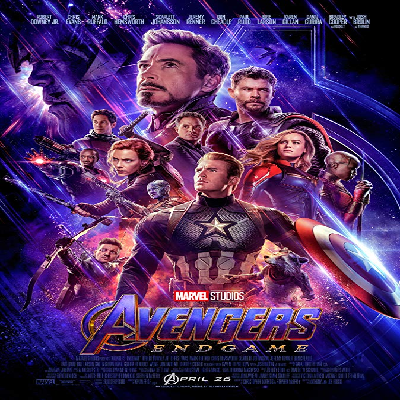

<class 'float'>
text prediction:
[(0.30079227881585696, 'Comedy')]
picture prediction:
[(0.46344805, 'Comedy'), (0.49206528, 'Drama')]

Result:
Comedy 0.3008 0.4634
Drama 0.1637 0.4921


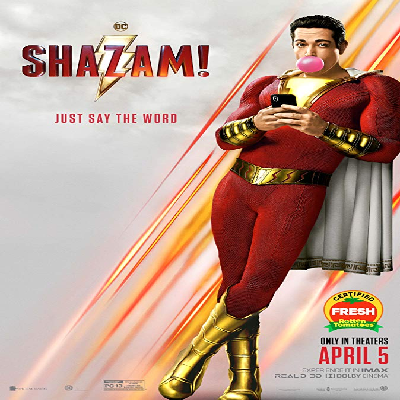

<class 'float'>
text prediction:
[]
picture prediction:
[(0.51008767, 'Drama')]

Result:
Drama 0.1026 0.5101
Action 0.1415 0.2718
Comedy 0.2252 0.1876


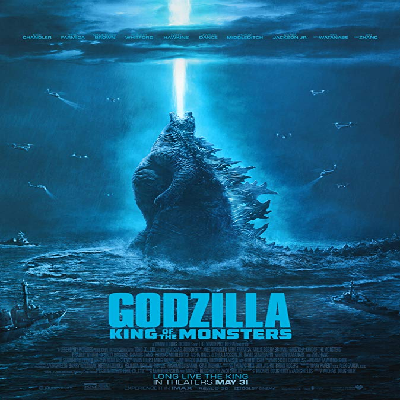

<class 'float'>
text prediction:
[(0.3862731251608417, 'Action'), (0.34199284118201667, 'Science Fiction'), (0.3209196221722661, 'Horror'), (0.30901666753217183, 'Thriller')]
picture prediction:
[(0.44017053, 'Comedy'), (0.4933232, 'Drama')]

Result:
Drama 0.1804 0.4933
Action 0.3863 0.1712
Comedy 0.0658 0.4402
Thriller 0.3090 0.0930
Horror 0.3209 0.0395


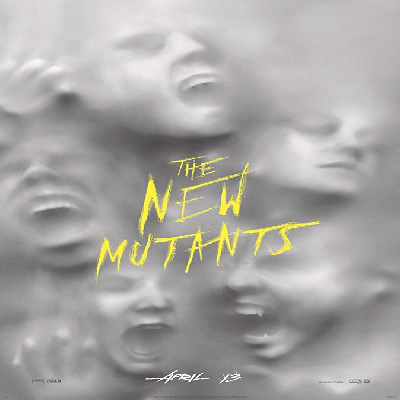

<class 'float'>
text prediction:
[]
picture prediction:
[(0.32447457, 'Comedy'), (0.50331813, 'Drama')]

Result:
Drama 0.2806 0.5033
Comedy 0.1994 0.3245
Family Film 0.2530 0.0569


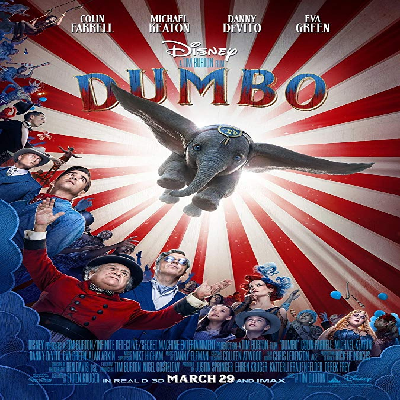

<class 'float'>
text prediction:
[(0.398876375337446, 'Animation'), (0.337826222292053, 'Fantasy')]
picture prediction:
[(0.50629616, 'Drama')]

Result:
Drama 0.1914 0.5063
Animation 0.3989 0.0338
Fantasy 0.3378 0.0920
Comedy 0.1368 0.2834
Action 0.0911 0.2608
Family Film 0.2757 0.0535
Adventure 0.1626 0.1446


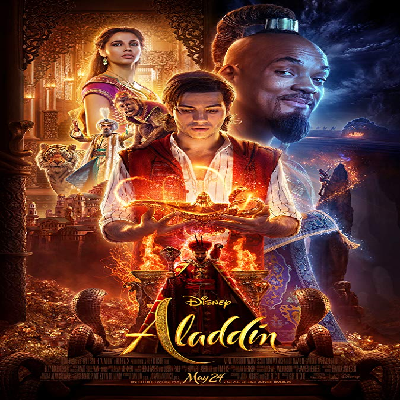

<class 'float'>
text prediction:
[(0.6869398931324726, 'Animation'), (0.6205426356258757, 'Family Film'), (0.3590986346646768, 'Short Film')]
picture prediction:
[(0.5081261, 'Drama')]

Result:
Animation 0.6869 0.0278
Family Film 0.6205 0.0454
Drama 0.0492 0.5081
Comedy 0.2680 0.2608
Short Film 0.3591 0.0111
Action 0.0549 0.2577


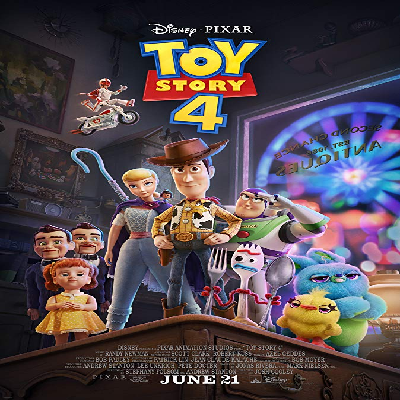

<class 'float'>
text prediction:
[(0.35987046272398177, 'Action')]
picture prediction:
[(0.50914496, 'Drama')]

Result:
Drama 0.2866 0.5091
Action 0.3599 0.2702
Thriller 0.1979 0.2317
Comedy 0.0865 0.2306


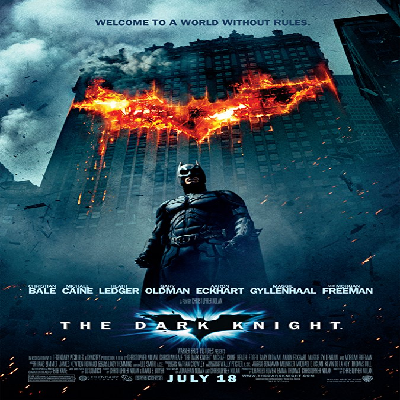

<class 'float'>
text prediction:
[(0.5086696034626805, 'Drama')]
picture prediction:
[(0.5063702, 'Drama')]

Result:
Drama 0.5087 0.5064
Action 0.1761 0.2704
Thriller 0.1216 0.2271
Crime 0.1048 0.2243
Comedy 0.0780 0.2485


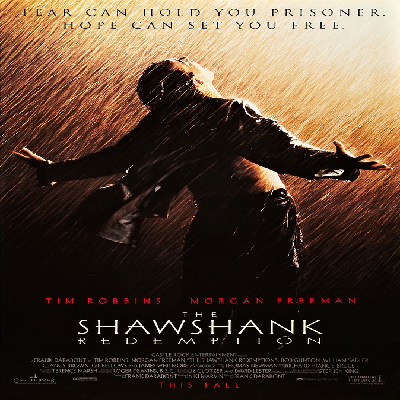

In [172]:
for i in range(1, 10):
    text = str(open('tests/%d.txt' % i).read())
    pic = image.load_img('tests/%d.jpg' % i, target_size=(400,400,3))
    res = final_result(text, pic)
    show_result(res)

[(0.6715567822082356, 0.16365749784544253, 0.5078993, 'Drama'), (0.5692435820594941, 0.30079227881585696, 0.2684513, 'Comedy'), (0.37086107868350077, 0.10619055766261148, 0.26467052, 'Action'), (0.2798177956437406, 0.06873086679928868, 0.21108693, 'Thriller'), (0.27283437394057464, 0.054401157726394624, 0.21843322, 'Crime'), (0.23717456029650863, 0.09280807243582902, 0.14436649, 'Adventure'), (0.2232420685696198, 0.10090566603418126, 0.1223364, 'Horror'), (0.18604007842219092, 0.028257836720111156, 0.15778224, 'Romance'), (0.17176028876365151, 0.12061098753274406, 0.0511493, 'Family Film'), (0.14432642830838488, 0.03261433018674182, 0.1117121, 'Documentary'), (0.14039695008934128, 0.029772785746461014, 0.110624164, 'Mystery'), (0.137824403907334, 0.043625081743275305, 0.09419932, 'Fantasy'), (0.13057155251648453, 0.11708797976520088, 0.013483573, 'Short Film'), (0.09759356823100458, 0.002504512633222443, 0.095089056, 'Sci-Fi'), (0.0924574251422639, 0.008502256418203841, 0.08395517, 'Bi

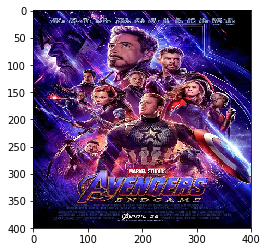

In [87]:
text = str(open('tests/1.txt').read())
pic = image.load_img('tests/1.jpg',target_size=(400,400,3))
res = final_result(text, pic)
show_result(res)